<a href="https://colab.research.google.com/github/msasen/pytorch/blob/main/2_pytorch_ile_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PyTorch - Linear Regression*

<!-- <iframe width="560" height="315" src="https://www.youtube.com/embed/ECHX1s0Kk-o?controls=0" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> -->


## Makine Öğrenimi

<img src="https://i.imgur.com/oJEQe7k.png" width="500">


## Tensörler ve Gradyanlar

# Lineer Regresyon'u NumPy'da Kodlama


In [73]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [71]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving linear.csv to linear.csv
User uploaded file "linear.csv" with length 3156 bytes


In [77]:
data = pd.read_csv("/content/linear.csv")
data

,metrekare,fiyat
0,82.583220,134.907414
1,73.922466,134.085180
2,34.887445,71.151500
3,61.839983,100.237277
4,16.775940,31.376437
...,...,...
94,85.740859,133.922297
95,65.179788,126.827116
96,24.333765,50.257797
97,85.157757,144.754676


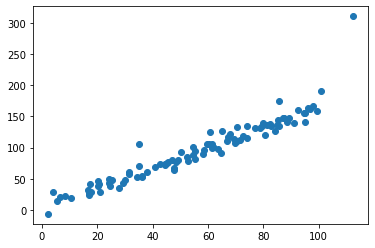

In [84]:
x = data["metrekare"] # Metrekareleri bir axis' e çekelim, panda nın özelliği.
y = data["fiyat"] # Üstteki ile aynı.
x = x.to_numpy()
y = y.to_numpy()
plt.scatter(x,y) 


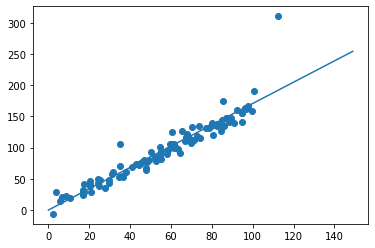

In [103]:

#Doğrumuzun denklemi y = m*a+b , Biz ise en uygun m ve b yi arıyoruz. m Eğim, b kesim noktası
m,b = np.polyfit(x,y,1)# NumPy bizim için grafiğe oturtuyor çizgimizi. Bunu matematiksel
# İşlemlerle uzun uzun da yapabilirdik. Fakat NumPy halihazırda sahip. Çok kafa karıştırmamak 
# Adına böylesi daha iyi.
# np.polyfit(x ekseni, y ekseni, kaçıncı dereceden polinom denklemi) ki biz birinci dereceden kullanacağız.
a = np.arange(150)
plt.scatter(x,y) # Scatter ile nokta çizdirimi yapıyoruz.
plt.plot(m*a+b) #




255.97776611456254
y= 1.7065577894578212 x+ -0.005902304110628285


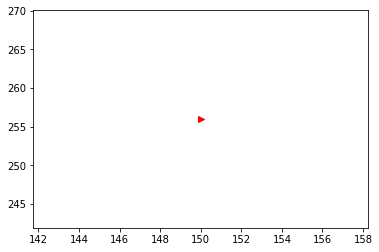

In [104]:
z=150
tahmin = m*z+b
print(tahmin)
print("y=",m,"x+",b)
plt.scatter(z,tahmin,c="red",marker=">")
plt.show()



# Linear Regression'un arkasındaki matematik

Bir doğru eğim ve x'e sıfır verdiğimizde y'yi kestiği yerden oluşur.
`y=mx+b`
sürekli m ve b yi güncelleyerek doğru değeri bulmamız gerekmektedir.


In [1]:
# Import Numpy & PyTorch
import numpy as np
import torch

Tensör bir sayı, vektör, matris veya herhangi bir n-boyutlu dizidir.

In [2]:
# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)

In [3]:
# Print tensors
print(x)
print(w)
print(b)

tensor(3.)
tensor(4., requires_grad=True)
tensor(5., requires_grad=True)


Tensörleri olağan aritmetik işlemlerle birleştirebiliriz.

In [4]:
# Arithmetic operations
y = w * x + b
print(y)

tensor(17., grad_fn=<AddBackward0>)


PyTorch'u özel kılan şey, `requires_grad` değerinin `True` olarak ayarlandığı tensörlere göre `y` türevini otomatik olarak hesaplayabilmemizdir, yani `w` ve `b`.

In [ ]:
# y = w * x + b idi. Biz y'ye göre türev al dediğimizde req_grad değerleri
# true olan tüm değişkenlerin y ye göre türevine
# w.grad ile ulaşıyoruz.
y.backward()

In [9]:
# y = 3w + b
# bunun w'ya göre türevi 3
# bunun b'ya göre türevi 1 dir.
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dw: tensor(3.)
dy/db: tensor(2.)


## Sorun Bildirimi

Bir bölgedeki ortalama sıcaklık, yağış ve neme (*girdi değişkenleri veya özellikler*) bakarak elma ve portakal için ürün verimlerini (*hedef değişkenler*) tahmin eden bir model oluşturacağız. İşte eğitim verileri:

<img src="https://i.imgur.com/lBguUV9.png" width="500" />

Bir **doğrusal regresyon** modelinde, her bir hedef değişken, girdi değişkenlerinin ağırlıklı bir toplamı olarak tahmin edilir ve sapma olarak bilinen bazı sabitlerle dengelenir:

```
yeild_apple = w11 * sıcaklık + w12 * yağış + w13 * nem + b1
yeild_orange = w21 * sıcaklık + w22 * yağış + w23 * nem + b2
```

Görsel olarak bu, elma veriminin sıcaklık, yağış ve nemin doğrusal veya düzlemsel bir fonksiyonu olduğu anlamına gelir.

<img src="https://i.imgur.com/mtkR2lB.png" width="540" >


**Hedefimiz**: Doğru tahminler yapmak için eğitim verilerini kullanarak uygun bir *ağırlık* ve *önyargı* kümesi bulmak.

## Eğitim Verileri
Eğitim verileri, her biri gözlem başına bir satır ve değişken başına bir sütun olmak üzere 2 matris (girdiler ve hedefler) kullanılarak temsil edilebilir.

In [10]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [12]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

Bir model oluşturmadan önce, girdileri ve hedefleri PyTorch tensörlerine dönüştürmemiz gerekir.

In [13]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


## Doğrusal Regresyon Modeli (sıfırdan)

Ağırlıklar* ve *biyanslar* rastgele değerlerle başlatılan matrisler olarak da gösterilebilir. w`nin ilk satırı ve `b`nin ilk elemanı, ilk hedef değişkeni, yani elmalar için verimi ve benzer şekilde portakallar için ikincisini tahmin etmek için kullanılır.

In [14]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 0.2693,  0.7082, -1.2524],
        [-0.2629, -0.2759,  0.7515]], requires_grad=True)
tensor([-1.5775,  0.8429], requires_grad=True)


Model* basitçe `x` girdisi ile `w` ağırlıklarının (transpoze edilmiş) matris çarpımını gerçekleştiren ve `b` yanlılığını (her gözlem için çoğaltılmış) ekleyen bir fonksiyondur.

$$
\hspace{2.5cm} X \hspace{1.1cm} \times \hspace{1.2cm} W^T \hspace{1.2cm}  + \hspace{1cm} b \hspace{2cm}
$$

$$
\left[ \begin{array}{cc}
73 & 67 & 43 \\
91 & 88 & 64 \\
\vdots & \vdots & \vdots \\
69 & 96 & 70
\end{array} \right]
%
\times
%
\left[ \begin{array}{cc}
w_{11} & w_{21} \\
w_{12} & w_{22} \\
w_{13} & w_{23}
\end{array} \right]
%
+
%
\left[ \begin{array}{cc}
b_{1} & b_{2} \\
b_{1} & b_{2} \\
\vdots & \vdots \\
b_{1} & b_{2} \\
\end{array} \right]
$$

In [15]:
# Define the model
def model(x):
    return x @ w.t() + b

Giriş verilerinin modele aktarılmasıyla elde edilen matris, hedef değişkenler için bir tahminler kümesidir.

In [16]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ 11.6797,  -4.5199],
        [  5.0991,   0.7354],
        [ 44.1141, -15.4135],
        [ 10.0081, -10.0314],
        [ -2.6752,   8.8210]], grad_fn=<AddBackward0>)


In [17]:
# Compare with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


Rastgele ağırlıklar ve önyargılarla başladığımız için, model hedef değişkenleri tahmin etmede çok iyi bir iş çıkarmıyor.

## Kayıp Fonksiyonu

Aşağıdaki yöntemi kullanarak tahminleri gerçek hedeflerle karşılaştırabiliriz: 
* İki matris (`preds` ve `targets`) arasındaki farkı hesaplayın.
* Negatif değerleri kaldırmak için fark matrisinin tüm elemanlarının karesini alın.
* Elde edilen matristeki elemanların ortalamasını hesaplayın.

Sonuç, **ortalama karesel hata** (MSE) olarak bilinen tek bir sayıdır.

In [20]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    # sum toplam işareti numel ise eleman sayısı
    return torch.sum(diff * diff) / diff.numel()

In [21]:
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(7662.8320, grad_fn=<DivBackward0>)


Ortaya çıkan sayı **kayıp** olarak adlandırılır, çünkü modelin hedef değişkenleri tahmin etmede ne kadar kötü olduğunu gösterir. Kayıp ne kadar düşükse model o kadar iyidir. 

## Gradyanları Hesapla

PyTorch ile, `requires_grad` değerinin `True` olarak ayarlanmış olması nedeniyle, `kayıp` değerinin ağırlıklara ve önyargılara göre gradyanını veya türevini otomatik olarak hesaplayabiliriz.

In [22]:
# Compute gradients
loss.backward()

Gradyanlar ilgili tensörlerin `.grad` özelliğinde saklanır.

In [23]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[ 0.2693,  0.7082, -1.2524],
        [-0.2629, -0.2759,  0.7515]], requires_grad=True)
tensor([[-5034.4390, -6068.7837, -3789.5552],
        [-7975.1128, -9260.6123, -5536.3936]])


In [24]:
# Gradients for bias
print(b)
print(b.grad)

tensor([-1.5775,  0.8429], requires_grad=True)
tensor([-62.5548, -96.0817])


Kalkülüsten elde edilen önemli bir kavrayış, gradyanın kaybın değişim oranını veya kayıp fonksiyonunun ağırlıklara ve önyargılara göre eğimini göstermesidir. 

* Eğer bir gradyan elemanı **pozitif** ise, 
    * Elemanın değerini biraz **arttırmak** kaybı **arttıracaktır**.
    * Elemanın değerini biraz **azaltmak** kaybı **azaltacaktır**.

<img src="https://i.imgur.com/2H4INoV.png" width="400" />



* Bir gradyan elemanı **negatif** ise,
    * Elemanın değerini biraz **arttırmak** kaybı **azaltacaktır**.
    * Elemanın değerini biraz **azaltmak** kaybı **arttıracaktır**.
    
<img src="https://i.imgur.com/h7E2uAv.png" width="400" />    

Artış veya azalma, eğimin değeri ile orantılıdır.

Son olarak, ilerlemeden önce gradyanları sıfırlayacağız, çünkü PyTorch gradyanları biriktirir.

In [25]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


## Gradyan inişi kullanarak ağırlıkları ve önyargıları ayarlayın

Aşağıdaki adımlara sahip olan gradyan iniş algoritmasını kullanarak kaybı azaltacağız ve modelimizi geliştireceğiz:

1. Tahminler oluşturun
2. Kaybı hesaplayın
3. Ağırlıklara ve önyargılara göre gradyanları hesaplayın
4. Gradyanla orantılı küçük bir miktar çıkararak ağırlıkları ayarlayın
5. Gradyanları sıfıra sıfırlayın

In [26]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ 11.6797,  -4.5199],
        [  5.0991,   0.7354],
        [ 44.1141, -15.4135],
        [ 10.0081, -10.0314],
        [ -2.6752,   8.8210]], grad_fn=<AddBackward0>)


In [27]:
# Calculate the loss
loss = mse(preds, targets)
print(loss)

tensor(7662.8320, grad_fn=<DivBackward0>)


In [28]:
# Compute gradients
loss.backward()

In [29]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [30]:
print(w)

tensor([[ 0.3197,  0.7689, -1.2145],
        [-0.1832, -0.1833,  0.8069]], requires_grad=True)


Yeni ağırlıklar ve önyargılar ile modelin daha düşük bir kayba sahip olması gerekir.

In [31]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(5326.5439, grad_fn=<DivBackward0>)


## Çoklu epoklar için eğitin

Kaybı daha da azaltmak için, gradyanları kullanarak ağırlıkları ve önyargıları ayarlama işlemini birçok kez tekrarlıyoruz. Her iterasyona bir epok denir.

In [50]:
# Train for 100 epochs
for i in range(10000):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [51]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(0.5209, grad_fn=<DivBackward0>)


In [52]:
# Print predictions
preds

tensor([[ 56.9022,  70.4457],
        [ 82.3717, 100.5845],
        [118.7360, 132.9360],
        [ 21.1147,  36.9980],
        [101.8781, 119.1600]], grad_fn=<AddBackward0>)

In [49]:
# Print targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

## PyTorch yerleşik bileşenlerini kullanan Doğrusal Regresyon Modeli

PyTorch'un bazı yerleşik işlevlerini ve sınıflarını kullanarak aynı modeli yeniden uygulayalım.

In [53]:
# Imports
import torch.nn as nn

In [54]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119]], dtype='float32')

In [55]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

### Veri Kümesi ve DataLoader

Tuple olarak `inputs` ve `targets` satırlarına erişim sağlayan bir `TensorDataset` oluşturacağız. Ayrıca eğitim sırasında verileri gruplara ayırmak için bir DataLoader oluşturacağız. Ayrıca karıştırma ve örnekleme gibi diğer yardımcı programları da sağlar.

In [56]:
# Import tensor dataset & data loader
from torch.utils.data import TensorDataset, DataLoader

In [57]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [58]:
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[ 69.,  96.,  70.],
         [ 91.,  88.,  64.],
         [ 69.,  96.,  70.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.]]), tensor([[103., 119.],
         [ 81., 101.],
         [103., 119.],
         [119., 133.],
         [ 22.,  37.]])]

### nn.Linear
Ağırlıkları ve önyargıları manuel olarak başlatmak yerine, modeli `nn.Linear` kullanarak tanımlayabiliriz.

In [59]:
# Define model
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.4646,  0.0533, -0.0238],
        [-0.0633,  0.0053,  0.5055]], requires_grad=True)
Parameter containing:
tensor([-0.3988, -0.3436], requires_grad=True)


### Optimizer
Gradyanları kullanarak ağırlıkları ve önyargıları manuel olarak değiştirmek yerine, `optim.SGD` optimizerini kullanabiliriz.

In [60]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

### Kayıp Fonksiyonu
Manuel olarak bir kayıp fonksiyonu tanımlamak yerine, yerleşik kayıp fonksiyonu `mse_loss`u kullanabiliriz.

In [61]:
# Import nn.functional
import torch.nn.functional as F

In [62]:
# Define loss function
loss_fn = F.mse_loss

In [63]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(9653.9473, grad_fn=<MseLossBackward0>)


### Modeli eğitin

Artık modeli eğitmeye hazırız. Modeli belirli sayıda epok için eğiten bir `fit` fayda fonksiyonu tanımlayabiliriz.

In [64]:
# Define a utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
    print('Training loss: ', loss_fn(model(inputs), targets))

In [65]:
# Train the model for 100 epochs
fit(100, model, loss_fn, opt)

Training loss:  tensor(9.6794, grad_fn=<MseLossBackward0>)


In [66]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 57.8216,  71.1318],
        [ 80.7950, 100.5843],
        [120.2575, 131.5837],
        [ 25.5625,  42.2615],
        [ 96.8140, 115.8772],
        [ 57.8216,  71.1318],
        [ 80.7950, 100.5843],
        [120.2575, 131.5837],
        [ 25.5625,  42.2615],
        [ 96.8140, 115.8772],
        [ 57.8216,  71.1318],
        [ 80.7950, 100.5843],
        [120.2575, 131.5837],
        [ 25.5625,  42.2615],
        [ 96.8140, 115.8772]], grad_fn=<AddmmBackward0>)

In [67]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# Bonus: Feedfoward Sinir Ağı

![ffnn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Multi-Layer_Neural_Network-Vector-Blank.svg/400px-Multi-Layer_Neural_Network-Vector-Blank.svg.png)

Kavramsal olarak, ileri beslemeli sinir ağlarını, aralarında doğrusal olmayan bir aktivasyon fonksiyonu uygulanarak üst üste yığılmış iki veya daha fazla doğrusal regresyon modeli olarak düşünebilirsiniz.

<img src="https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png" width="640">

Doğrusal regresyon yerine ileri beslemeli bir sinir ağı kullanmak için PyTorch'tan `nn.Module` sınıfını genişletebiliriz.

In [68]:
class SimpleNet(nn.Module):
    # Initialize the layers
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(3, 3)
        self.act1 = nn.ReLU() # Activation function
        self.linear2 = nn.Linear(3, 2)
    
    # Perform the computation
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        return x

Şimdi modeli, optimize ediciyi ve kayıp fonksiyonunu daha önce olduğu gibi tanımlayabiliriz.

In [69]:
model = SimpleNet()
opt = torch.optim.SGD(model.parameters(), 1e-5)
loss_fn = F.mse_loss

Son olarak, daha önce doğrusal regresyon için tanımlanan aynı `fit` fonksiyonunu kullanarak modeli eğitmek için gradyan inişi uygulayabiliriz.

<img src="https://i.imgur.com/g7Rl0r8.png" width="500">

In [70]:
fit(100, model, loss_fn, opt)

Training loss:  tensor(10.0424, grad_fn=<MseLossBackward0>)
